#Laptop Price Prediction

# 1) Data Cleaning

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np

In [2]:
#Uploading the dataset
data=pd.read_csv('/content/laptop_price.csv',encoding='latin-1')

In [3]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
# Converting the price in euros to indian rupees
data['Price_euros']=data['Price_euros']*53

In [5]:
data.rename(columns={"Price_euros":"price"},inplace=True)

In [6]:
data.shape

(1303, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  price             1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
#removing the duplicate value from the dataset from the row
data.duplicated().sum()

0

In [9]:
# checking the null values
data.isnull().sum()

,0
laptop_ID,0
Company,0
Product,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [10]:
data.drop(columns=['laptop_ID'],axis=1,inplace=True)

In [11]:
# we are removing the text GB from the column RAM
data['Ram']=data['Ram'].str.replace('GB','')

In [12]:
# we are removing the text Kg from the column Weight
data['Weight']=data['Weight'].str.replace('kg','')

In [13]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80


In [14]:
# converting the data type into integer and float respectively
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

#2) EDA

In [15]:
#Importing the seaborn libraries for visualization
import seaborn as sns

<ipython-input-16-331dd13f2f56>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

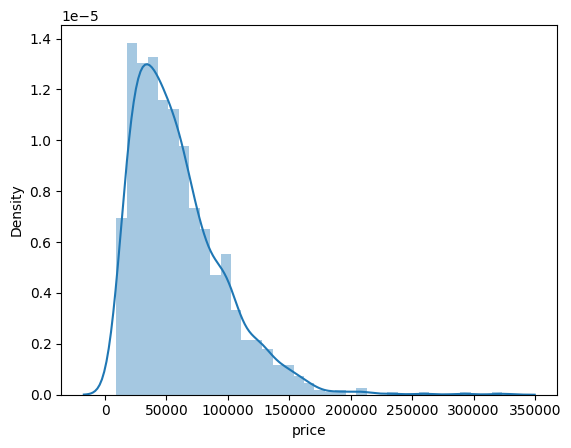

In [16]:
sns.distplot(data['price'])

<Axes: xlabel='Company'>

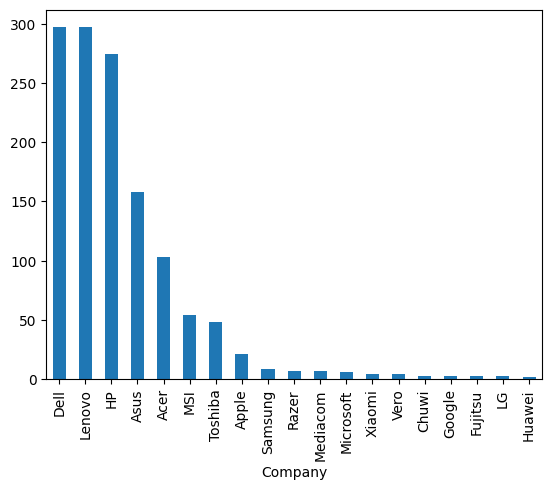

In [17]:
# Which company laptop demand is High
data['Company'].value_counts().plot(kind='bar')

In [18]:
import matplotlib.pyplot as plt

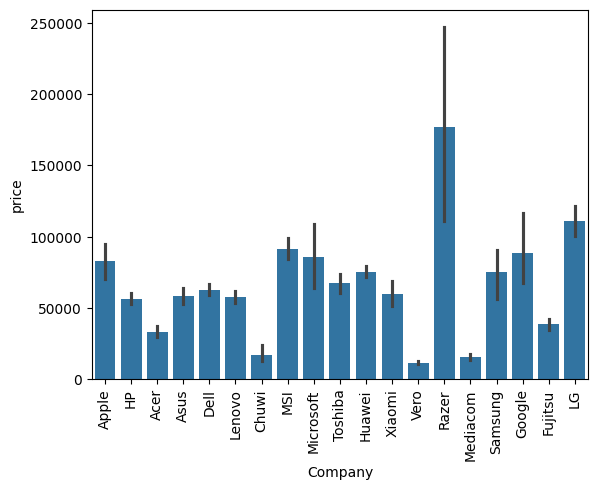

In [19]:
# Here we are comparing the laptop company with price of the laptop
sns.barplot(x=data['Company'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

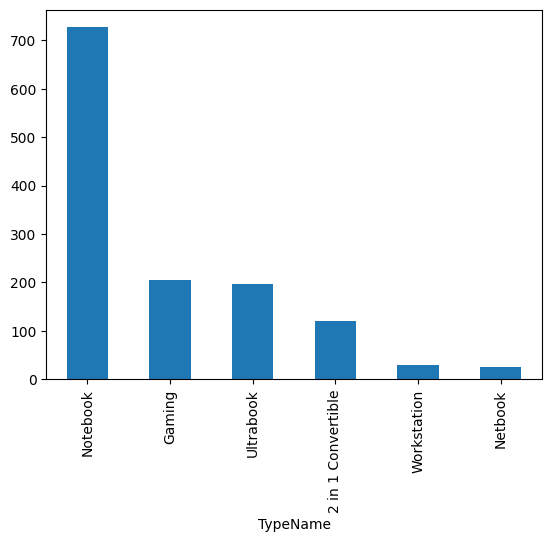

In [20]:
# here we are analyzing the notebook type laptop demand is more in comparision with all type of laptop
data['TypeName'].value_counts().plot(kind='bar')

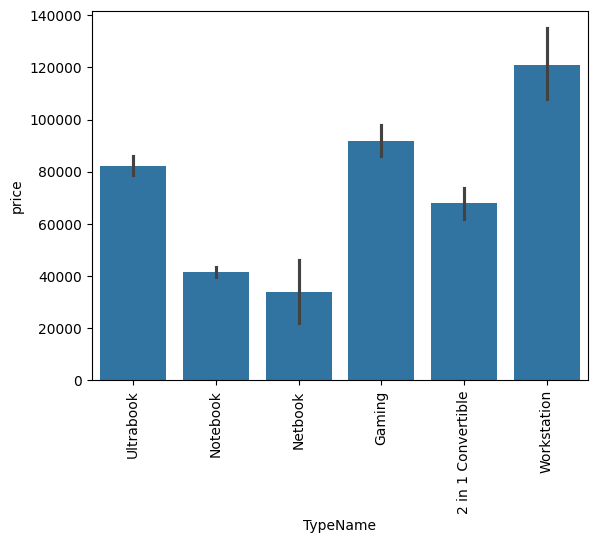

In [21]:
# which kind of laptop type is relatively expensive in all the type of categories
sns.barplot(x=data['TypeName'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-22-081d9de6c2d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

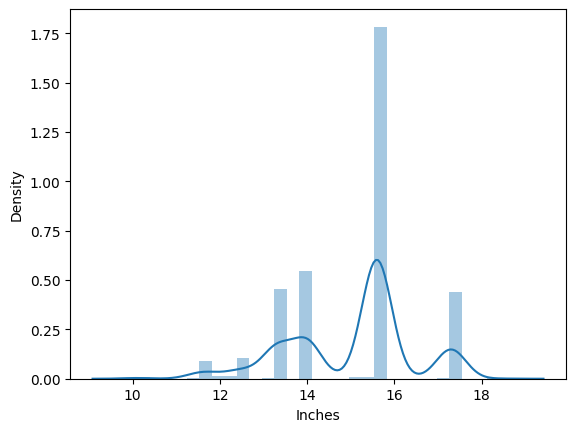

In [22]:
# whcih kind of laptop display size is high in demand
sns.distplot(data['Inches'])

<Axes: xlabel='Inches', ylabel='price'>

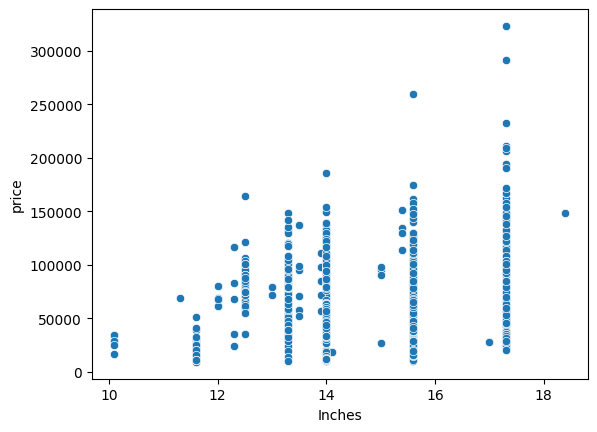

In [23]:
# whcih kind of laptop display size is high in demand wrt to price.
sns.scatterplot(x=data['Inches'],y=data['price'])

In [24]:
data['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [25]:
# Creating the New column and verifying the screen of the laptop is touchscreen or not.For 0 it's not the touchscreen and for 1,it's a touchscreen.
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [26]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0


In [27]:
data.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen
399,Lenovo,Thinkpad X1,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.13,139125.00,0
997,Acer,Aspire ES1-533,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.40,20140.00,0
166,Acer,Aspire 3,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.10,19266.03,0
354,Toshiba,Tecra A50-C-21G,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,2.40,74359.00,0
719,HP,ProBook 470,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.63,63600.00,0


<Axes: xlabel='Touchscreen'>

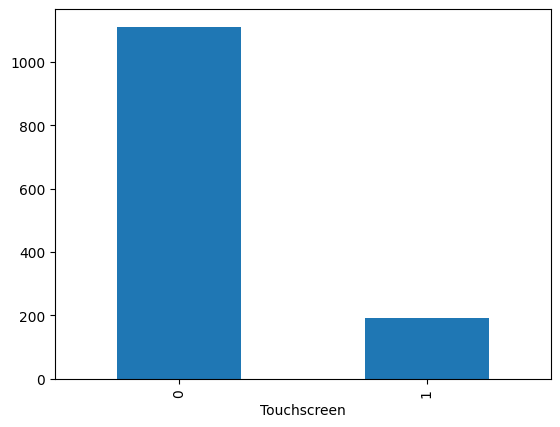

In [28]:
#Comapring the laptop is touchscreen with no touchscreen
data['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='price'>

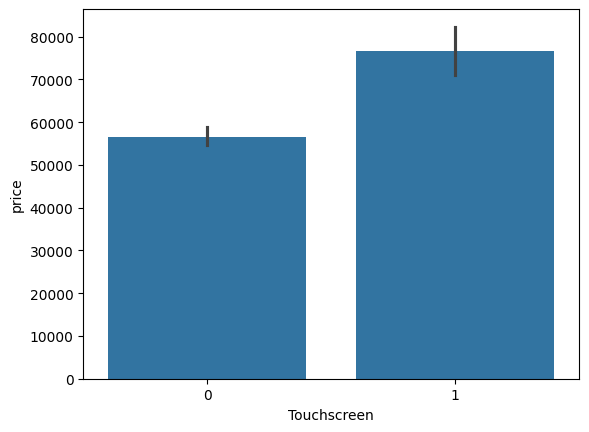

In [29]:
# Comparing the price of touchscreen with no touchscreen.
sns.barplot(x=data['Touchscreen'], y=data['price']) # Changed the code to pass x and y as named arguments

In [30]:
#Creating the column IPS new and verifying it is having the IPS Screen resolution or not
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1


<Axes: xlabel='IPS', ylabel='price'>

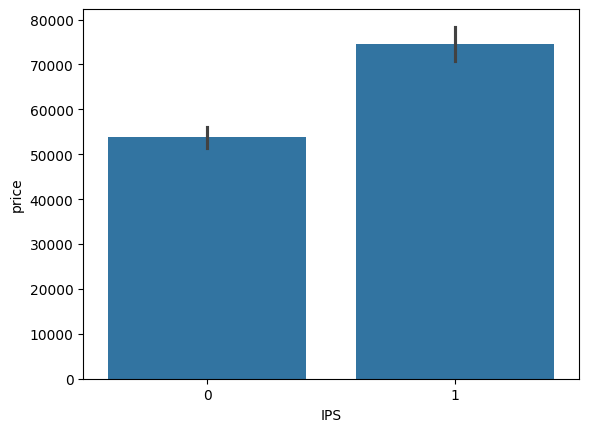

In [31]:
# Comaparing the IPS Screen with price
sns.barplot(x=data['IPS'], y=data['price']) # Changed the code to pass x and y as named arguments

In [32]:
# Here we are spliting on the basis of "x" entire screen resolution for creating new column,X_resolution and Y_resolution
new=data['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
data['X_resolution']=new[0]
data['Y_resolution']=new[1]

In [34]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,IPS Panel Retina Display 2560,1600


In [35]:
# Here we are applying the re function to extract all the numerical value from the X_resolution column "str.findall(r'(\d+\.?\d+)') and applyin the lambda
# function to don't display the output in list""
data['X_resolution']=data['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
data['X_resolution']

,X_resolution
0,2560
1,1440
2,1920
3,2880
4,2560
...,...
1298,1920
1299,3200
1300,1366
1301,1366


In [37]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,X_resolution,Y_resolution
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,2560,1600


In [38]:
data['X_resolution']=data['X_resolution'].astype('int')
data['Y_resolution']=data['Y_resolution'].astype('int')

In [39]:
# Forming the new column and taking the input with the help of X_resolution and y_resolution
data['ppi']=((data['X_resolution']**2)+(data['Y_resolution']**2))**0.5/(data['Inches']).astype('float')

In [40]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,X_resolution,Y_resolution,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,2560,1600,226.983005


In [41]:
# Droping the ScreenResolution column as all the information contained in different column such as ppi,X_resolution and Y_resolution and Touchscreen
data.drop(columns=['ScreenResolution'],axis=1,inplace=True)

In [42]:
data.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,X_resolution,Y_resolution,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,2560,1600,226.983005


In [43]:
# Droping this column because the ppi column already having this information inside it,because PPI column formed with the help of X_resolution,Y_resolution and inches columns.
data.drop(columns=['Inches','X_resolution','Y_resolution'],axis=1,inplace=True)

In [44]:
# Focusing on the CPU(Feature of the laptop,mainly decide with this factor)
data['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [45]:
#Creatin the new column Cpu brand to first three main word from the CPu column to get main info about the CPU
data['Cpu_name']=data['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))

In [46]:
data.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,ppi,Cpu_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,226.983005,Intel Core i5


In [47]:
def fetch_processor(text):
  if text=='Intel Core i7' or text=='Intel Core i5' or  text=='Intel Core i3':
    return text
  else:
    if text.split()[0]=='Intel':
      return "Other Intel Processor"

    else:
      return 'AMD Processor'

In [48]:
data['Cpu_processor']=data['Cpu_name'].apply(fetch_processor)

In [49]:
data.head(10)

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,ppi,Cpu_name,Cpu_processor
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,226.983005,Intel Core i5,Intel Core i5
5,Acer,Aspire 3,Notebook,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,21200.00,0,0,100.454670,AMD A9-Series 9420,AMD Processor
6,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,113418.41,0,1,220.534624,Intel Core i7,Intel Core i7
7,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,61411.10,0,0,127.677940,Intel Core i5,Intel Core i5
8,Asus,ZenBook UX430UN,Ultrabook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79235.00,0,0,157.350512,Intel Core i7,Intel Core i7
9,Acer,Swift 3,Ultrabook,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,40810.00,0,1,157.350512,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu_processor'>

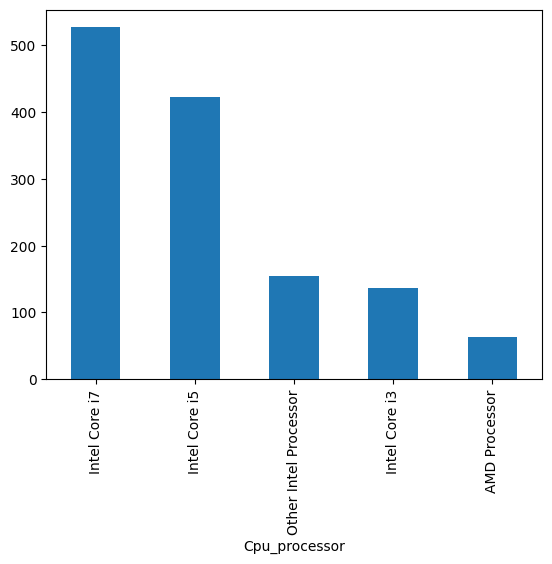

In [50]:
data['Cpu_processor'].value_counts().plot(kind='bar')

In [51]:
# Dropin the CPU column as main information is got contained in CPU_name column
data.drop(['Cpu'],axis=1,inplace=True)

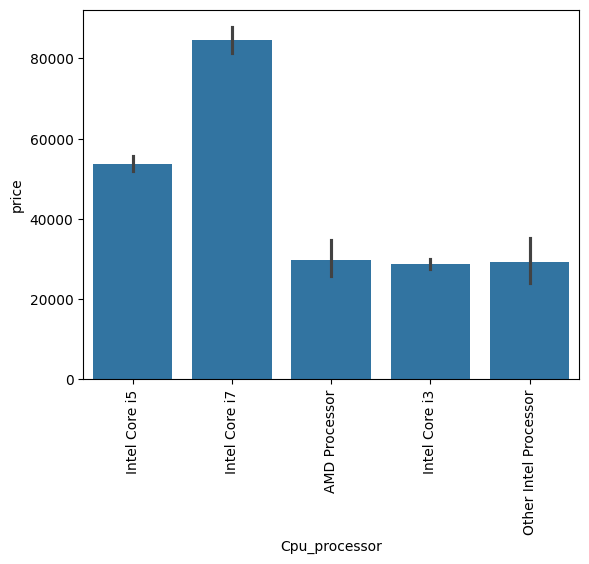

In [52]:
sns.barplot(x=data['Cpu_processor'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

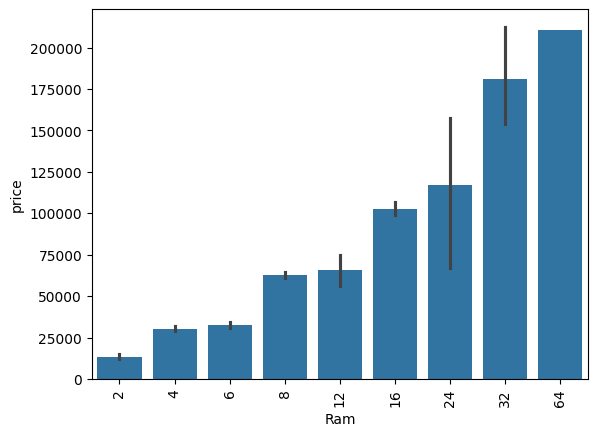

In [53]:
sns.barplot(x=data['Ram'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
# Analyzing the memory column with their categories and memory size
data['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [55]:
# Go into memory column and converting them into string and removing "\.0,GB with '' " and "TB with 000".
data['Memory']=data['Memory'].astype(str).replace('\.0','',regex=True)
data['Memory']=data['Memory'].str.replace('GB','')
data['Memory']=data['Memory'].str.replace('TB','000')

In [56]:
# After removing we are spliting on the basis of "+" and creating the dataframe named as new
new=data['Memory'].str.split('+',n=1,expand=True)
new.head()

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None


In [57]:
# Extracting the column of memory
data['first']=new[0]
data['first']=data['first'].str.strip()
data['first']

,first
0,128 SSD
1,128 Flash Storage
2,256 SSD
3,512 SSD
4,256 SSD
...,...
1298,128 SSD
1299,512 SSD
1300,64 Flash Storage
1301,1000 HDD


In [58]:
# creatin the respective column if the type of memory present in the data['first']
data['Layer1HDD'] = data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer1SDD'] = data['first'].apply(lambda x: 1 if 'SDD' in x else 0)
data['Layer1Hybrid'] = data['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [59]:
#removing the text data and extracting the numerical data['first'] column
data['first']=data['first'].str.replace(r'\D','')
data['first']

,first
0,128 SSD
1,128 Flash Storage
2,256 SSD
3,512 SSD
4,256 SSD
...,...
1298,128 SSD
1299,512 SSD
1300,64 Flash Storage
1301,1000 HDD


In [60]:
#filling the null values with zero
data['second']=new[1]
data['second'].fillna('0',inplace=True)
data['second']

<ipython-input-60-1842ca970efe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['second'].fillna('0',inplace=True)


,second
0,0
1,0
2,0
3,0
4,0
...,...
1298,0
1299,0
1300,0
1301,0


In [61]:
#For layer two,creating the respective column if the type of memory present in the data['second']
data['Layer2HDD'] = data['second'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer2SDD'] = data['second'].apply(lambda x: 1 if 'SDD' in x else 0)
data['Layer2Hybrid'] = data['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

# Removing the text data and extracting the numerical data['first'] column
data['second']=data['second'].str.replace(r'\D','')

In [62]:
# #converting the data type from object to integer
# data['first']=data['first'].astype('int')
# data['second']=data['second'].astype('int')

In [63]:
# Removing the text data and extracting the numerical data['first'] column
data['first']=data['first'].str.replace(r'\D','')
# Convert the 'first' column to numeric, handling errors
data['first'] = pd.to_numeric(data['first'], errors='coerce').fillna(0).astype(int)

# Removing the text data and extracting the numerical data['second'] column
data['second']=data['second'].str.replace(r'\D','')
# Convert the 'second' column to numeric, handling errors
data['second'] = pd.to_numeric(data['second'], errors='coerce').fillna(0).astype(int)

In [64]:
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,...,first,Layer1HDD,Layer1SDD,Layer1Hybrid,Layer1Flash_Storage,second,Layer2HDD,Layer2SDD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,...,0,0,0,0,1,0,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,...,0,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Inserting the values into the dataframe
data['HDD']=(data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SDD']=(data['second']*data['Layer1SDD']+data['second']*data['Layer2SDD'])
data['Hybrid']=(data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_storage']=(data['first']*data['Layer1Flash_Storage']+data['second']*data['Layer2Flash_Storage'])

In [66]:
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,...,Layer1Flash_Storage,second,Layer2HDD,Layer2SDD,Layer2Hybrid,Layer2Flash_Storage,HDD,SDD,Hybrid,Flash_storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,...,1,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,...,0,0,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# Droping the columns
data.drop(columns=['first','second','Layer1HDD','Layer1SDD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD',
'Layer2SDD','Layer2Hybrid','Layer2Flash_Storage'],axis=1,inplace=True)

In [68]:
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,ppi,Cpu_name,Cpu_processor,HDD,SDD,Hybrid,Flash_storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,226.983005,Intel Core i5,Intel Core i5,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,127.677940,Intel Core i5,Intel Core i5,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,220.534624,Intel Core i7,Intel Core i7,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,226.983005,Intel Core i5,Intel Core i5,0,0,0,0


In [69]:
data.sample()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,price,Touchscreen,IPS,ppi,Cpu_name,Cpu_processor,HDD,SDD,Hybrid,Flash_storage
156,Lenovo,Yoga 520-14IKB,2 in 1 Convertible,4,256 SSD,Intel HD Graphics 620,Windows 10,1.74,33337.0,1,1,157.350512,Intel Core i3,Intel Core i3,0,0,0,0


In [70]:
data.drop(['Memory'],axis=1,inplace=True)

In [71]:
data.drop(['Hybrid','Flash_storage'],axis=1,inplace=True)

In [72]:
data.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,price,Touchscreen,IPS,ppi,Cpu_name,Cpu_processor,HDD,SDD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71003.57,0,1,226.983005,Intel Core i5,Intel Core i5,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47643.82,0,0,127.677940,Intel Core i5,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,30475.00,0,0,141.211998,Intel Core i5,Intel Core i5,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,134484.85,0,1,220.534624,Intel Core i7,Intel Core i7,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,95590.80,0,1,226.983005,Intel Core i5,Intel Core i5,0,0


In [73]:
# Taking up the consideration of GPU column and extracting the type of GPU band
data['Gpu_brand']=data['Gpu'].apply(lambda x:x.split()[0])

In [74]:
data['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [75]:
data['Gpu_brand']=data["Gpu_brand"][data['Gpu_brand']!="ARM"]

In [76]:
data['Gpu_brand'].value_counts()

,count
Gpu_brand,
Intel,722
Nvidia,400
AMD,180


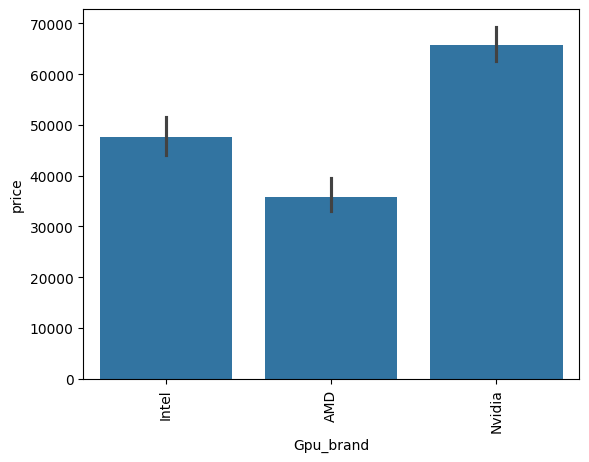

In [77]:
sns.barplot(x=data['Gpu_brand'],y=data['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [78]:
data.drop(['Gpu'],axis=1,inplace=True)

In [79]:
# Extracting the type of operating system present in the dataset
data['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


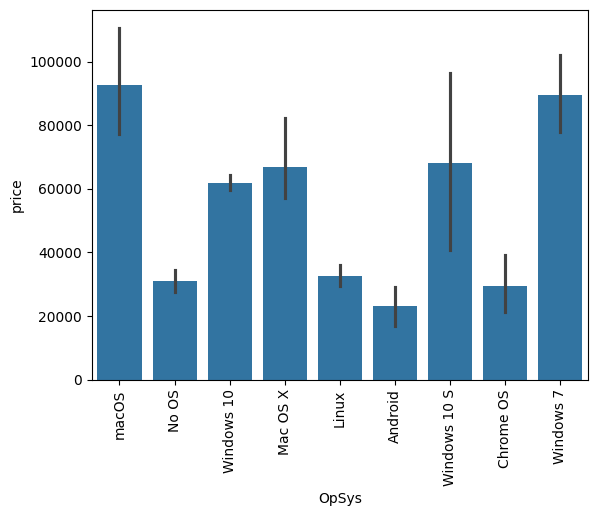

In [80]:
# Analysing the data with respect to operating system
sns.barplot(x=data['OpSys'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
def cat_os(inp):
  if inp=='Windows 10' or inp=='Windows 7' or  inp=='Windows 10 S':
    return "Windows"

  elif inp=='macOS' or inp=='Mac OS X':
      return "Mac"

  else:
      return 'OtherOs/No OS/Linux'

In [82]:
data['os']=data['OpSys'].apply(cat_os)

In [83]:
data=data.drop(['OpSys','Cpu_name','Product'],axis=1)

In [84]:
# Final Dataset for implementing the machine learning algorithm
data.head()

,Company,TypeName,Ram,Weight,price,Touchscreen,IPS,ppi,Cpu_processor,HDD,SDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71003.57,0,1,226.983005,Intel Core i5,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47643.82,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30475.00,0,0,141.211998,Intel Core i5,0,0,Intel,OtherOs/No OS/Linux
3,Apple,Ultrabook,16,1.83,134484.85,0,1,220.534624,Intel Core i7,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,95590.80,0,1,226.983005,Intel Core i5,0,0,Intel,Mac


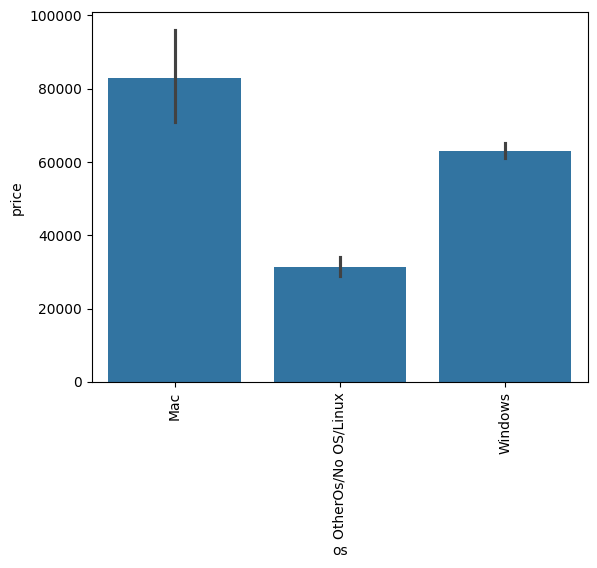

In [85]:
sns.barplot(x=data['os'],y=data['price'])
plt.xticks(rotation='vertical')
plt.show()

# 3) Feature Scaling

In [87]:
X=data.drop(columns=['price'])
y=data['price']

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in X.columns:
  if X[i].dtypes=='object':
     X[i]=le.fit_transform(X[i])

In [89]:
X[i]

,os
0,0
1,0
2,1
3,0
4,0
...,...
1298,2
1299,2
1300,2
1301,2


In [90]:
# Distributing the data for train test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [91]:
from sklearn.metrics import r2_score

In [92]:
data.head()

,Company,TypeName,Ram,Weight,price,Touchscreen,IPS,ppi,Cpu_processor,HDD,SDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71003.57,0,1,226.983005,Intel Core i5,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47643.82,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30475.00,0,0,141.211998,Intel Core i5,0,0,Intel,OtherOs/No OS/Linux
3,Apple,Ultrabook,16,1.83,134484.85,0,1,220.534624,Intel Core i7,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,95590.80,0,1,226.983005,Intel Core i5,0,0,Intel,Mac


#4)Model Building

In [93]:
X.head(1)

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu_processor,HDD,SDD,Gpu_brand,os
0,1,4,8,1.37,0,1,226.983005,2,0,0,1,0


In [ ]:
# from sklearn.linear_model import LinearRegression

In [ ]:
# # Linear Regressor
# reg = LinearRegression().fit(X_train, y_train)
# y_pred=reg.predict(X_test)
# print(r2_score(y_test,y_pred))

In [ ]:
# from sklearn.tree import DecisionTreeRegressor

In [ ]:
# # Decision Tree
# reg= DecisionTreeRegressor().fit(X_train,y_train)
# y_pred=reg.predict(X_test)
# print(r2_score(y_test,y_pred))


In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
#  RandomForest Regressor
reg= RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15).fit(X_train,y_train)
y_pred=reg.predict(X_test)
print(r2_score(y_test,y_pred))

0.8705179955969569


In [96]:
import pickle

In [97]:
filename = 'trained_model.sav'
pickle.dump(reg, open(filename, 'wb'))

In [98]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))